# 7 Metop-B/C IASI - Ammonia (NH<sub>3</sub>) - Level 2

The [Infrared Atmospheric Sounding Interferometer (IASI)](https://www.eumetsat.int/iasi) is an instrument onboard the Metop-A/B satellites. It provides information on the vertical structure of temperature and humidity as well as main atmospheric species.

IASI data are distributed via:
- the [EUMETSAT data centre (Earth Observation Portal)](https://eoportal.eumetsat.int/), and
- external services, e.g. [AERIS](https://www.aeris-data.fr/).

IASI Level 2 data are disseminated in `BUFR` originally. AERIS implemented the [IASI portal](https://iasi.aeris-data.fr/), which provides the data in `netCDF` format. This notebook shows you how you can load, browse and visualize Total Column Ammonia (NH<sub>3</sub>) data from the IASI instrument.

#### This module has the following outline:
* [1 - Load and browse Metop-A/B IASI Level 2 data](#load)
* [2 - Mask Metop-A IASI Level 2 data](#masking)
* [3 - Combine Metop-A/B IASI Level 2 data](#combine)

#### Load required libraries

In [1]:
import sys
!{sys.executable} -m pip install cartopy netCDF4 h5netcdf==1.3.0 satpy==0.51.0 pyhdf h5py python-geotiepoints

In [2]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

from netCDF4 import Dataset
import xarray as xr

from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = FutureWarning)

#### Load helper functions

In [3]:
if os.path.exists("functions.ipynb"):
    %run functions.ipynb
elif os.path.exists("../functions.ipynb"):
    %run ../functions.ipynb
else:
    print("Helper functions notebook not found in any specified path. Downloading from Gitlab.")    
    !wget https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/raw/master/functions.ipynb
    %run functions.ipynb

In [4]:
if os.path.exists("bucket_functions.ipynb"):
    %run bucket_functions.ipynb
elif os.path.exists("../bucket_functions.ipynb"):
    %run ../bucket_functions.ipynb
else:
    print("Helper functions notebook not found in any specified path. Downloading from Gitlab.")    
    !wget https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/raw/master/90_workshops/202410_wmo_school/bucket_functions.ipynb
    %run bucket_functions.ipynb

In [5]:
base_url = 'https://s3.waw3-2.cloudferro.com/swift/v1/wmo/'
all_paths_list = list_data_on_bucket(base_url)

all_directories_list = [os.path.dirname(path) for path in all_paths_list if path.count('/') <= 4]
# Take unique directories
all_directories_list = list(np.unique(all_directories_list))
all_directories_list

Status ok



[np.str_('eodata'),
 np.str_('eodata/fci'),
 np.str_('eodata/fci/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--x-x---x_C_EUMT_20240924092245_IDPFI_OPE_20240924092007_20240924092928_N__C_0057_0000'),
 np.str_('eodata/gome2'),
 np.str_('eodata/gome2/aai'),
 np.str_('eodata/gome2/hcho'),
 np.str_('eodata/gome2/hcho/daily'),
 np.str_('eodata/gome2/no2'),
 np.str_('eodata/gome2/no2/daily'),
 np.str_('eodata/iasi'),
 np.str_('eodata/iasi/co'),
 np.str_('eodata/iasi/nh3'),
 np.str_('eodata/meteosat'),
 np.str_('eodata/meteosat/2020'),
 np.str_('eodata/meteosat/2024'),
 np.str_('eodata/modis'),
 np.str_('eodata/modis/10km'),
 np.str_('eodata/modis/level_1b'),
 np.str_('eodata/monarch'),
 np.str_('eodata/pmap'),
 np.str_('eodata/s3'),
 np.str_('eodata/s3/aod'),
 np.str_('eodata/s3/aod/S3A_SL_2_AOD____20240821T082340_20240821T082839_20240821T101507_0299_116_078______MAR_O_NR_003.SEN3'),
 np.str_('eodata/s3/aod/S3A_SL_2_AOD____20240825T081954_20240825T082453_20240825T101112_0299_116_

In [6]:
latmin = -40
latmax = 10
lonmin = 0
lonmax = 40

<hr>

## <a id="load"></a>Load and browse Metop-B IASI Level 2 products

Metop-B/C IASI Total Column Ammonia (NH<sub>3</sub>) Level 2 data from the [IASI portal](https://iasi.aeris-data.fr/) are disseminated in the `netCDF` format. You can use the Python library [xarray](http://xarray.pydata.org/en/stable/index.html) to access and manipulate datasets in `netCDF` format.


### Load netCDF data with `xarray`

`xarray`'s function `open_dataset` enables you to open a `netCDF` file. Once loaded, you can inspect the data structure of the `IASI` data disseminated by the IASI portal.

You see, that the data is a one-dimensional vector with more than 630,000 individual data points. `latitude`, `longitude` and other parameters are stored as individual data variables.

In [7]:
data_path = base_url+'eodata/iasi/nh3/IASI_METOPB_L2_NH3_20230821_ULB-LATMOS_V4.0.0.nc'
file_2b = open_data_from_bucket(data_path)
file_2b

File opened: https://s3.waw3-2.cloudferro.com/swift/v1/wmo/eodata/iasi/nh3/IASI_METOPB_L2_NH3_20230821_ULB-LATMOS_V4.0.0.nc


<xarray.Dataset> Size: 219MB
Dimensions:                                                             (
                                                                         time: 1288721,
                                                                         midlevels: 14,
                                                                         levels: 15)
Coordinates:
  * time                                                                (time) datetime64[ns] 10MB ...
  * levels                                                              (levels) float32 60B ...
  * midlevels                                                           (midlevels) float32 56B ...
    latitude                                                            (time) float32 5MB ...
    longitude                                                           (time) float32 5MB ...
Data variables: (12/29)
    AERIStime                                                           (time) datetime64[ns] 10MB ...
    solar_zenith_angle                                                  (time) float32 5MB ...
    satellite_zenith_angle                                              (time) float32 5MB ...
    ground_height                                                       (time) float32 5MB ...
    orbit_number                                                        (time) float32 5MB ...
    scanline_number                                                     (time) float32 5MB ...
    ...                                                                  ...
    nh3_AvKnorm                                                         (time) float32 5MB ...
    nh3_Zcolumn                                                         (time, midlevels) float32 72MB ...
    AMPM                                                                (time) int8 1MB ...
    LS_mask                                                             (time) int8 1MB ...
    prefilter                                                           (time) int8 1MB ...
    postfilter                                                          (time) int8 1MB ...
Attributes: (12/26)
    title:                       Daily IASI/Metop-B ULB-LATMOS ammonia (NH3) ...
    institution:                 ULB-LATMOS
    id:                          IASI_METOPB_L2_NH3_20230821_ULB-LATMOS_V4.0....
    product_version:             4.0.0
    history:                     2023-11-17 08:50:10 - Product generated with...
    summary:                     This dataset contains Level-2 ammonia total ...
    ...                          ...
    platform:                    Metop-B
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_name:                L. Clarisse (Lieven.Clarisse@ulb.be), M. Van...
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

### Generate a `xarray .DataArray` with latitude and longtiude as coordinates

With the help of the function [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec), you can generate a `xarray.DataArray` object, with `latitude` and `longitude` values as coordinates and the `column` information as data values. This data structure will be helpful for plotting and masking the data.

In [8]:
nh3=file_2b['nh3_total_column']
nh3_da_2b = generate_xr_from_1D_vec(file=file_2b, 
                                    lat_path='latitude', 
                                    lon_path='longitude', 
                                    variable=nh3, 
                                    parameter_name='nh3', 
                                    longname='NH3 total column',
                                    no_of_dims=1, 
                                    unit='mol/m-2')
nh3_da_2b

<xarray.DataArray 'nh3' (ground_pixel: 1288721)> Size: 5MB
array([        nan,         nan,         nan, ...,  0.00026687,
       -0.00019089,  0.00013859], shape=(1288721,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 5MB 72.33 72.35 71.85 ... 18.36 18.61
    longitude  (ground_pixel) float32 5MB -123.0 -123.8 -123.9 ... 135.6 135.7
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  NH3 total column
    units:      mol/m-2

### Extract time coordinates

This line extracts the first timestamp from `file_2b.time`, converts it to a `numpy` date (`YYYY-MM-DD`), and stores it in the variable `time`.

In [9]:
time = file_2b.time[0].values.astype('datetime64[D]')

### Visualize the Metop-A IASI Level 2 data

The next step is to visualize the generated `xarray.DataArray`. You can re-use the [visualize_scatter](../functions.ipynb#visualize_scatter) function, that plots data points as a scatter plot.

/var/folders/49/4n_jx67x5gg0fw4kkd3zb_wm0000gn/T/ipykernel_18235/2771183413.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap(color_scale),


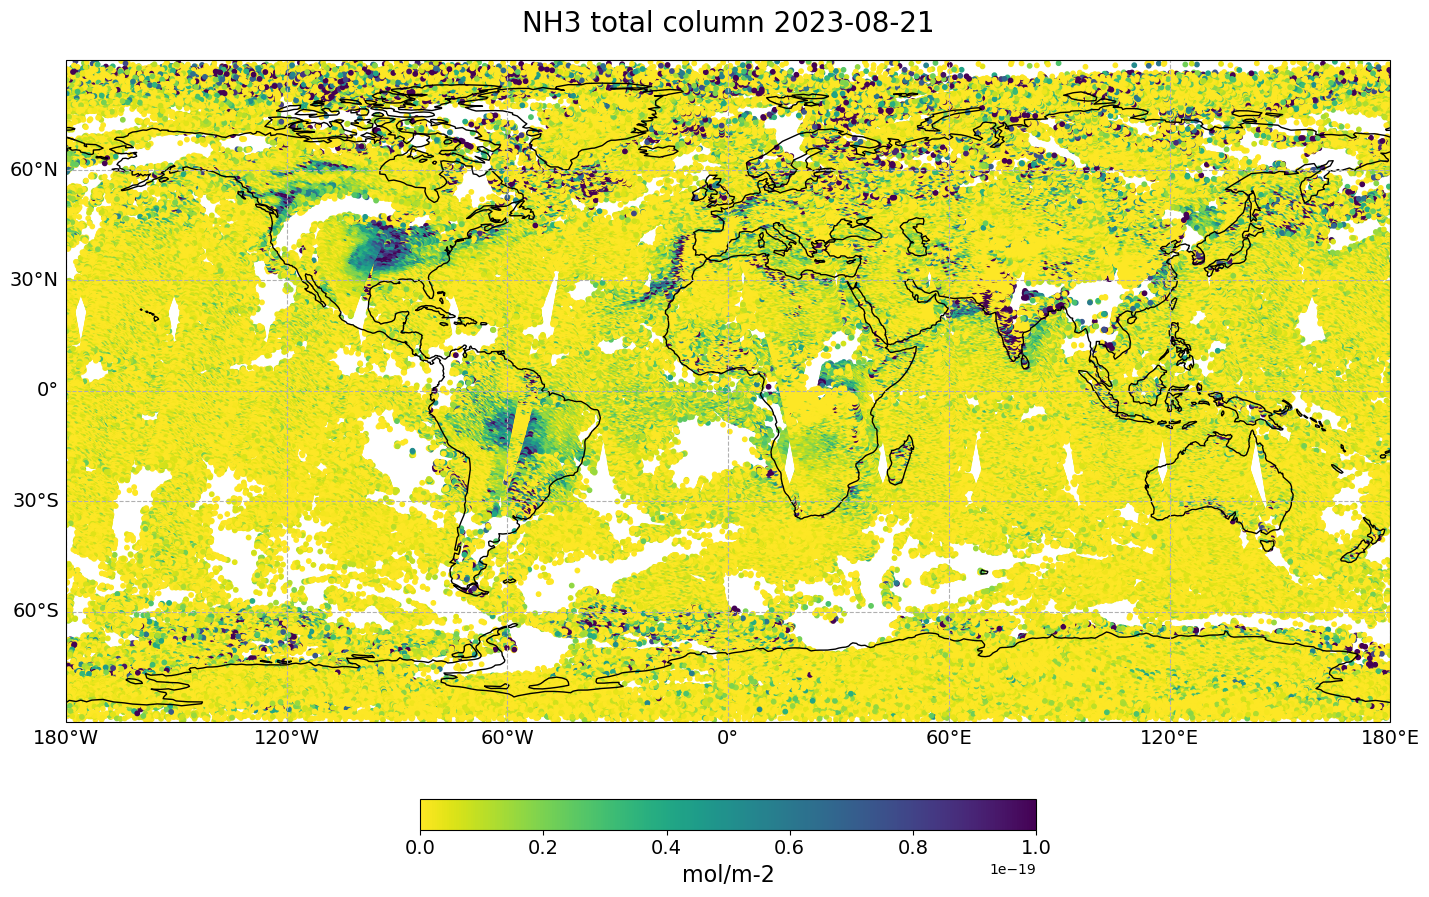

In [10]:
visualize_scatter(xr_dataarray=nh3_da_2b, 
                  conversion_factor=1e-16, 
                  projection=ccrs.PlateCarree(),
                  vmin=0,
                  vmax=1e-19, 
                  point_size=10,
                  color_scale='viridis_r', 
                  unit=nh3_da_2b.units, 
                  title=nh3_da_2b.long_name + ' ' + str(time))

You can aslo visualize the desired geographical area

/var/folders/49/4n_jx67x5gg0fw4kkd3zb_wm0000gn/T/ipykernel_18235/2771183413.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap(color_scale),


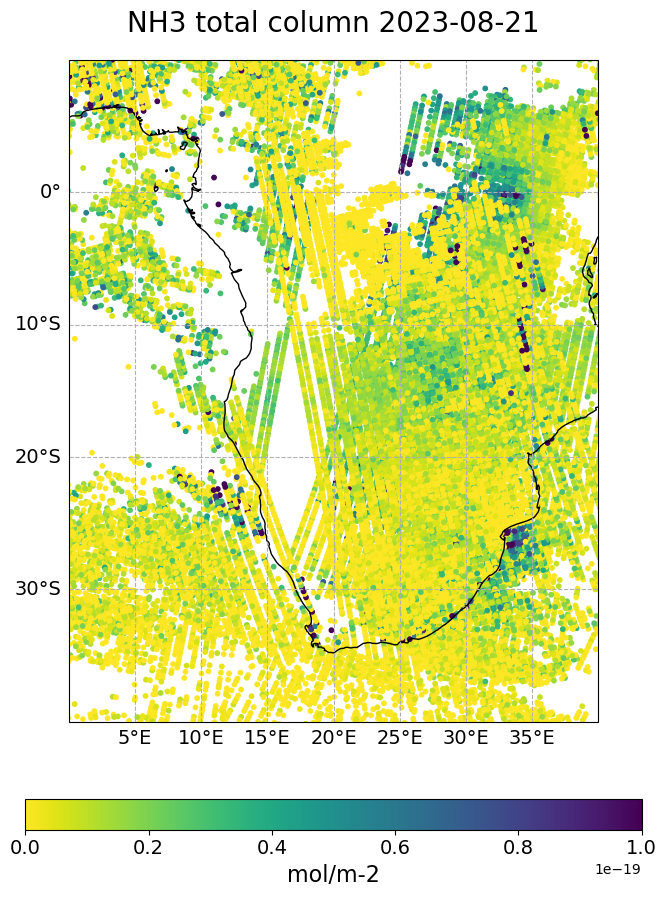

In [11]:
visualize_scatter(xr_dataarray=nh3_da_2b, 
                  conversion_factor=1e-16, 
                  projection=ccrs.PlateCarree(),
                  vmin=0,
                  vmax=1e-19, 
                  point_size=10,
                  color_scale='viridis_r', 
                  unit=nh3_da_2b.units, 
                  title=nh3_da_2b.long_name + ' ' + str(time),
                  lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax,
                 )

## <a id='masking'></a>Mask Metop-B IASI Level 2 data products

The IASI Level 2 data files provide you information on the Cloud Cover for each ground pixel. This information is useful to generate a cloud mask and to mask out data points with a cloud cover exceeding a specific threshold.

In order to do so, you have to load the cloud cover information `CLcov` from the data file. You can re-use the [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec) function again.

In [12]:
cloudCov = file_2b['cloud_coverage']
cloudCov

<xarray.DataArray 'cloud_coverage' (time: 1288721)> Size: 5MB
[1288721 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 10MB 2023-08-21T00:00:01 ... 2023-08-22
    latitude   (time) float32 5MB ...
    longitude  (time) float32 5MB ...
Attributes:
    long_name:    cloud coverage in the ground pixel (from IASI L2)
    valid_range:  [  0. 100.]
    units:        %

In [13]:
nh3_mask_2b = generate_xr_from_1D_vec(file=file_2b, 
                                      lat_path='latitude', 
                                      lon_path='longitude', 
                                      variable=cloudCov, 
                                      parameter_name='cloud coverage', 
                                      longname=cloudCov.long_name, 
                                      no_of_dims=1, 
                                      unit=cloudCov.units)
nh3_mask_2b

<xarray.DataArray 'cloud coverage' (ground_pixel: 1288721)> Size: 5MB
array([88.06, 98.18, 93.17, ...,  1.38,  4.11,  3.82],
      shape=(1288721,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 5MB 72.33 72.35 71.85 ... 18.36 18.61
    longitude  (ground_pixel) float32 5MB -123.0 -123.8 -123.9 ... 135.6 135.7
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  cloud coverage in the ground pixel (from IASI L2)
    units:      %

### Mask the `xarray.DataArray` with the `generate_masked_array` function

The cloud cover information can now be used to mask the `xarray.DataArray`. You can make use of the function [generate_masked_array](../functions.ipynb#generate_masked_array), where you can set a threshold. All data points with a cloud coverage beyond this threshold are masked out.
Let us mask out all ground pixels with a cloud cover with more than 10%.

You see that the number of data points reduced to just a bit more than 100,000 instead of more than 600,000. With the [visualize_scatter](../functions.ipynb#visualize_scatter) function, you can visualize the masked array.

In [14]:
nh3_2b_masked = generate_masked_array(xarray=nh3_da_2b,
                                      mask=nh3_mask_2b, 
                                      threshold=10, 
                                      operator='>',
                                      drop=True)
nh3_2b_masked

<xarray.DataArray (ground_pixel: 121344)> Size: 485kB
array([ 2.3027971e-04,  6.8978072e-05, -2.3936145e-03, ...,
        1.5601345e-05, -5.4138622e-05,  1.1368926e-04],
      shape=(121344,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 485kB 75.32 75.0 80.74 ... 17.71 17.64
    longitude  (ground_pixel) float32 485kB -123.1 -122.3 -121.0 ... 140.8 140.1
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  NH3 total column
    units:      mol/m-2

/var/folders/49/4n_jx67x5gg0fw4kkd3zb_wm0000gn/T/ipykernel_18235/2771183413.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap(color_scale),


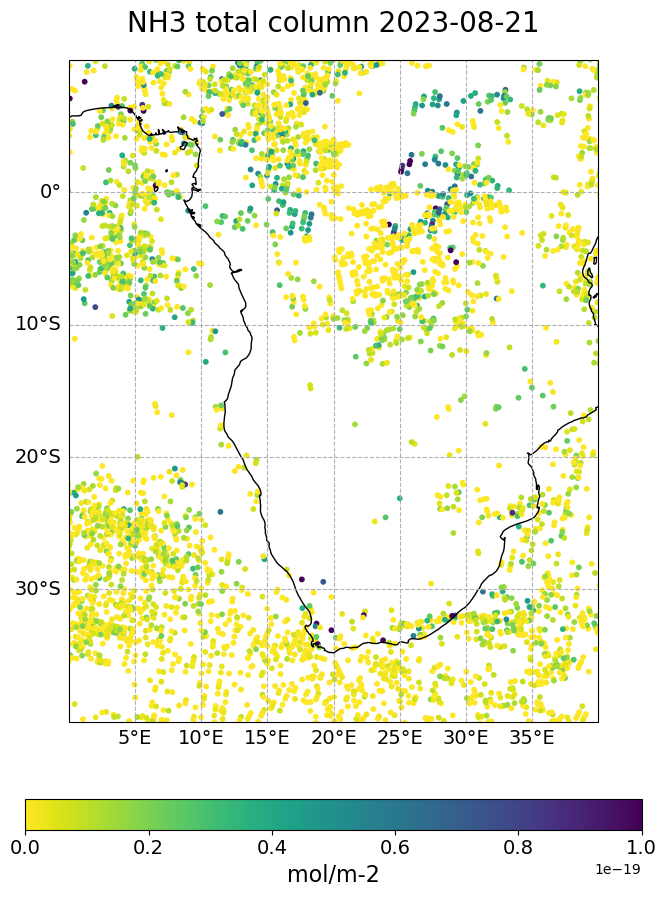

In [15]:
visualize_scatter(xr_dataarray=nh3_2b_masked, 
                  conversion_factor=1e-16, 
                  projection=ccrs.PlateCarree(),
                  vmin=0,
                  vmax=1e-19,
                  point_size=10,
                  color_scale='viridis_r', 
                  unit=nh3_2b_masked.units, 
                  title=nh3_2b_masked.long_name + ' ' + str(time),
                 lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax,
                 )

<br>

## <a id='combine'></a>Combine Metop-B/C IASI Level 2 products

You can combine IASI Level 2 data from both satellites, Metop-A and Metop-B. You have to repeat all the steps you did for IASI Level 2 data from the Metop-A satellite above for the data from the Metop-B satellite.

The steps include:
- [1. Load the Metop-B IASI Level 2 data](#step1)
- [2. Generate a xarray.DataArray with latitudes and longitudes as coordinates](#step2)
- [3. Load cloud cover information of the Metop-B IASI Level 2 data](#step3)
- [4. Generate a masked DataArray of the Metop-B IASI Level 2 data](#step4)

### Prepare Metop-C IASI Level 2 data

#### <a id='step1'></a>Load the Metop C IASI Level 2 data

In [16]:
data_path = base_url+'eodata/iasi/nh3/IASI_METOPC_L2_NH3_20230821_ULB-LATMOS_V4.0.0.nc'
file_2c = open_data_from_bucket(data_path)
file_2c

File opened: https://s3.waw3-2.cloudferro.com/swift/v1/wmo/eodata/iasi/nh3/IASI_METOPC_L2_NH3_20230821_ULB-LATMOS_V4.0.0.nc


<xarray.Dataset> Size: 219MB
Dimensions:                                                             (
                                                                         time: 1285623,
                                                                         midlevels: 14,
                                                                         levels: 15)
Coordinates:
  * time                                                                (time) datetime64[ns] 10MB ...
  * levels                                                              (levels) float32 60B ...
  * midlevels                                                           (midlevels) float32 56B ...
    latitude                                                            (time) float32 5MB ...
    longitude                                                           (time) float32 5MB ...
Data variables: (12/29)
    AERIStime                                                           (time) datetime64[ns] 10MB ...
    solar_zenith_angle                                                  (time) float32 5MB ...
    satellite_zenith_angle                                              (time) float32 5MB ...
    ground_height                                                       (time) float32 5MB ...
    orbit_number                                                        (time) float32 5MB ...
    scanline_number                                                     (time) float32 5MB ...
    ...                                                                  ...
    nh3_AvKnorm                                                         (time) float32 5MB ...
    nh3_Zcolumn                                                         (time, midlevels) float32 72MB ...
    AMPM                                                                (time) int8 1MB ...
    LS_mask                                                             (time) int8 1MB ...
    prefilter                                                           (time) int8 1MB ...
    postfilter                                                          (time) int8 1MB ...
Attributes: (12/26)
    title:                       Daily IASI/Metop-C ULB-LATMOS ammonia (NH3) ...
    institution:                 ULB-LATMOS
    id:                          IASI_METOPC_L2_NH3_20230821_ULB-LATMOS_V4.0....
    product_version:             4.0.0
    history:                     2023-11-17 09:20:08 - Product generated with...
    summary:                     This dataset contains Level-2 ammonia total ...
    ...                          ...
    platform:                    Metop-C
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_name:                L. Clarisse (Lieven.Clarisse@ulb.be), M. Van...
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

#### <a id='step2'></a>Generate a `xarray.DataArray` with latitude and longitude as coordinates

In [17]:
nh3=file_2c['nh3_total_column']
nh3_da_2c = generate_xr_from_1D_vec(file=file_2c, 
                                    lat_path='latitude', 
                                    lon_path='longitude', 
                                    variable=nh3, 
                                    parameter_name='NH£ total column', 
                                    longname=nh3.long_name, 
                                    no_of_dims=1, 
                                    unit=nh3.units)
nh3_da_2c

<xarray.DataArray 'NH£ total column' (ground_pixel: 1285623)> Size: 5MB
array([         nan,          nan,          nan, ..., 1.919083e-05,
                nan,          nan], shape=(1285623,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 5MB -79.23 -79.45 -79.51 ... -27.62 -27.68
    longitude  (ground_pixel) float32 5MB 134.1 133.9 135.8 ... -41.93 -42.39
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved NH3 total column in mole per square meter
    units:      mol m-2

#### <a id='step3'></a>Load cloud cover information of the Metop-B IASI Level 2 data

In [18]:
cloudCov = file_2c['cloud_coverage']
nh3_mask_2c = generate_xr_from_1D_vec(file=file_2c, 
                                      lat_path='latitude', 
                                      lon_path='longitude', 
                                      variable=cloudCov, 
                                      parameter_name='cloud coverage', 
                                      longname=cloudCov.long_name, 
                                      no_of_dims=1, 
                                      unit=cloudCov.units)
nh3_mask_2c

<xarray.DataArray 'cloud coverage' (ground_pixel: 1285623)> Size: 5MB
array([ 0.  ,  0.  ,  0.  , ..., 15.26, 50.45, 39.93],
      shape=(1285623,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 5MB -79.23 -79.45 -79.51 ... -27.62 -27.68
    longitude  (ground_pixel) float32 5MB 134.1 133.9 135.8 ... -41.93 -42.39
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  cloud coverage in the ground pixel (from IASI L2)
    units:      %

#### <a id='step4'></a>Generate a masked `xarray.DataArray` of the Metop-B IASI Level 2 data

In [19]:
nh3_2c_masked = generate_masked_array(xarray=nh3_da_2c,
                                      mask=nh3_mask_2c, 
                                      threshold=0.2, 
                                      operator='<', 
                                      drop=True)
nh3_2c_masked

<xarray.DataArray (ground_pixel: 313843)> Size: 1MB
array([ 4.5298393e-06, -5.3486434e-05, -5.5653996e-05, ...,
       -1.0503445e-04, -4.4328819e-05,  9.0471796e-05],
      shape=(313843,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 1MB -79.81 -80.08 -80.06 ... -27.88 -28.15
    longitude  (ground_pixel) float32 1MB 145.9 145.9 148.8 ... -43.77 -43.73
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved NH3 total column in mole per square meter
    units:      mol m-2

### Combine both NH<sub>3</sub> data arrays from Metop-A and Metop-B with `xarray.concat`

The last step is to concatenate both masked `xarray.DataArrays` from Metop-A and Metop-B into one single `DataArray`. You can use the function `xarray.concat` for it and use the dimension `ground_pixel` as concetanation dimension.

In [20]:
nh3_bc_da = xr.concat([nh3_2b_masked,nh3_2c_masked],dim='ground_pixel')
nh3_bc_da

<xarray.DataArray (ground_pixel: 435187)> Size: 2MB
array([ 2.3027971e-04,  6.8978072e-05, -2.3936145e-03, ...,
       -1.0503445e-04, -4.4328819e-05,  9.0471796e-05],
      shape=(435187,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 2MB 75.32 75.0 80.74 ... -27.88 -28.15
    longitude  (ground_pixel) float32 2MB -123.1 -122.3 -121.0 ... -43.77 -43.73
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  NH3 total column
    units:      mol/m-2

### Visualize the final masked Metop-A/B IASI Level 2 data with the `visualize_scatter` function

Now you can visualize the combined and masked `xarray.DataArray`. You can re-use the function [visualize_scatter](../functions.ipynb#visualize_scatter) data, which uses matplotlib's `scatterplot` function.

/var/folders/49/4n_jx67x5gg0fw4kkd3zb_wm0000gn/T/ipykernel_18235/2771183413.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap(color_scale),


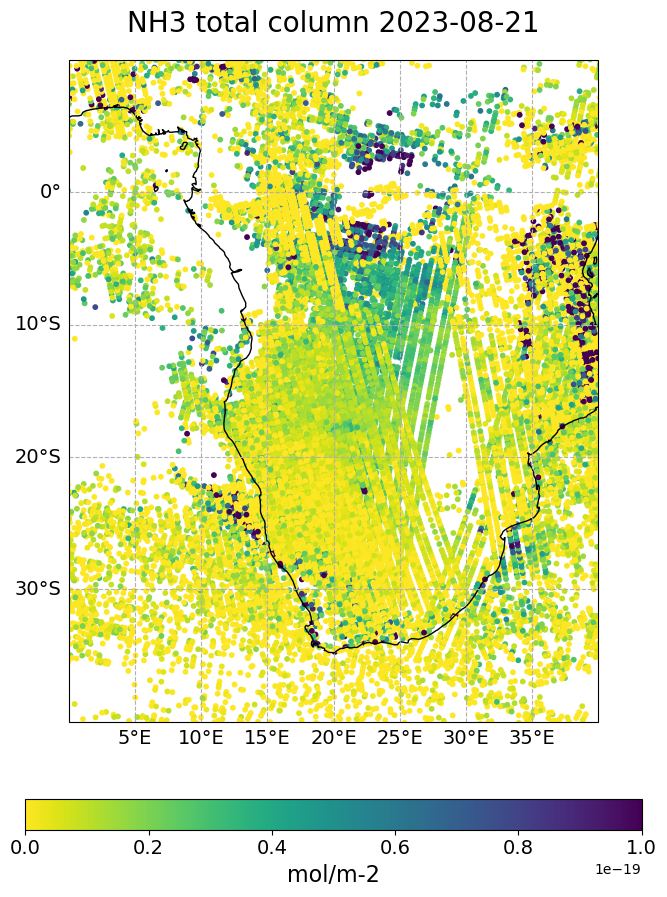

In [21]:
visualize_scatter(xr_dataarray=nh3_bc_da, 
                  conversion_factor=1e-16, 
                  projection=ccrs.PlateCarree(),
                  vmin=0,
                  vmax=1e-19,
                  point_size=10,
                  color_scale='viridis_r', 
                  unit=nh3_bc_da.units, 
                  title=nh3_bc_da.long_name + ' ' + str(time), 
                  lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax,)

<br>

<hr>

### Resources
This notebook was adapted from: https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/20_data_exploration/231_Metop-AB_IASI_NH3_L2_load_browse.ipynb?ref_type=headsCO

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>